# Google Play Store Apps Analysis and Predicting number of installs 

In a world where most businesses are moving towards digitalization, such as creating a website or developing a mobile application. I have decided to analyze one of the biggest app stores, which is the Google Play Store, as part of my Saudi Digital Academy final project.

The Play Store apps data has a huge potential to drive app-making businesses to success. By analyzing this data and trying to predict the number of installs an app can get, I hope that I can help developers to understand and capture the Android market.

#### Required libraries
First, Let’s Start with Importing the required libraries.
I am going to describe what each library is used for and then we will dive deeper into some of them when we use these libraries.

Pandas: Used for data manipulation and analysis.

Numpy: Is a Python library adding support for large, multi-dimensional arrays and matrices.

Matplotlib: Is a plotting library for Python.

Seaborn: Is data visualization library based on matplotlib

Sklearn: is a machine learning library for the Python

From Sklearn we imported three different models: Support Vector Machine, Logistic Regression, and Random Forest Regressor. We also imported a train_test_split method to split the data, a preprocessing method to help us with encoding the data, and metrics to calculate the error rate of the models.

Lastly, we imported Warnings to alert us of some condition in the program, where that condition normally doesn’t warrant. And we also added %matplotlib inline to turn on “inline plotting”, where plot graphics will appear in the notebook.


### Before we dive into the code,let me put the models that I used into words.

I used three different models to compare the error rate.

##### The first one was Support Vector Machine:
Support Vector Machine is an algorithm to find a hyperplane in an N-dimensional space, it is mostly used for classification. However, we can use support vector regression for regression and which is part of SVM and uses the same principles.

![SVM](SVM.png)
##### The Second is Logistic Regression:
Logistic Regression is a regression algorithm that predict a continuous outcome. It can also be used to model the probability of a certain class or event by adding a decision rule.

![LoR](Lor.webp)
##### Third is Random Forest Regressor:
First, we need to understand what is a decision tree. A decision trees a tree-like model of decisions and their possible consequences.

Random Forest Regressor consists of a large number of decision trees that operate as a group. Each individual tree spits out a class prediction and the class with the most votes becomes our model’s prediction.
![RFC](RFC.jpeg)


In [27]:
#Required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns # for making plots with seaborn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load data
I used the Google Play Store Apps from Kaggle Where you can find Here(https://www.kaggle.com/lava18/google-play-store-apps).

In [2]:
#Read the file
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Preprocessing
Before we start to process the data, we need to make sure that the data does not have any duplicated rows or rows with Null values.

In [3]:
#Drop duplicates rowas and drop rows that has Null Values
df.drop_duplicates(subset='App', inplace=True)
df.dropna(inplace = True)

Then, I removed any space in the columns name and replaced it with ‘_’ to make it easier to select columns.

In [4]:
#Replace any space in columns names to '_'  
df.columns = df.columns.str.replace(' ', '_')

Here, I have removed any plus or comma signs from Installs and changed the type to float, just to help the model to work properly. I also, removed the unit prefix form the size, the ‘$’ sign from the price, and changed their type to float as well.

In [5]:
# - Installs : Remove + and ,
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

#Change type to Float
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [7]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3

#Replace 'Varies with device' to 'NaN'
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

#Change type to Float
df['Size'] = df['Size'].apply(lambda x: float(x))

In [8]:
# - Price: Remove '$', And change type to Float
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

#Change type to Float
df['Reviews'] = df['Reviews'].apply(lambda x: float(x))

#### EDA
A for the Exploratory data analysis, I wanted to know what is the category that has the highest numbers of apps. Also, which category has the highest numbers of installs.

In [9]:
#Create a Series that has the top 5 categories with the hights numbers of Apps
top_5_categories = df['Category'].value_counts().sort_values(ascending=False).head()

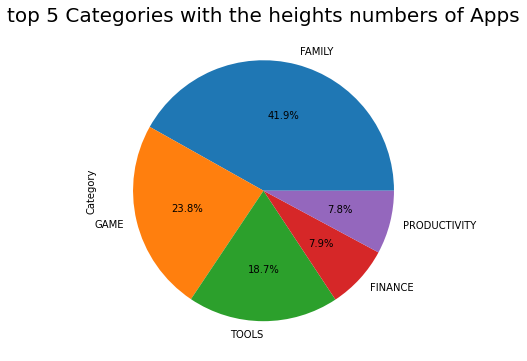

In [10]:
#Create pie chart with the top 5 categories
plt.subplots(figsize=[10,6]) #Plot size
plt.title('top 5 Categories with the hights numbers of Apps',size = 20) #Plot title
top_5_categories.plot.pie(autopct="%.1f%%"); #Create the plot

In [11]:
#Create a Series that has numbers of Apps in each category
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=False)
#Change type from Series to Dataframe
number_of_apps_in_category = number_of_apps_in_category.to_frame()
number_of_apps_in_category = number_of_apps_in_category.rename(columns={'Category': 'numbers of Apps'})

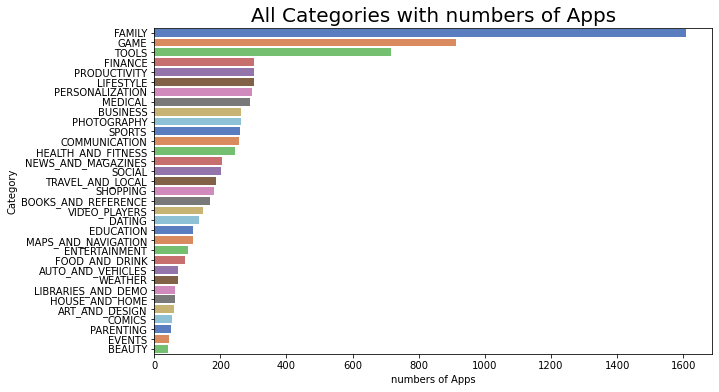

In [37]:
#Create a bar plot with numbers of Apps in each category
bar,ax = plt.subplots(figsize=(10,6)) #Plot size
plt.title('All Categories with numbers of Apps',size= 20) #Plot title
plt.ylabel('Category')
plt.xlabel('numbers of Apps')
#Create Plot
ax = sns.barplot(x=number_of_apps_in_category['numbers of Apps'], y=number_of_apps_in_category.index, data=number_of_apps_in_category, ci=None, palette="muted",orient='h', )

In [24]:
#Create a Series that has numbers of installs for each Category
most_puplar_categories = df.groupby(['Category']).Installs.sum()/100000000
#Change type from Series to Dataframe
most_puplar_categories = most_puplar_categories.sort_values(ascending=False).to_frame()

Surprisingly, even though the family category has the highest number of apps in the Android market, it came in seventh in popularity. Which I believe it means, that developers should focus more on developing apps in other categories.

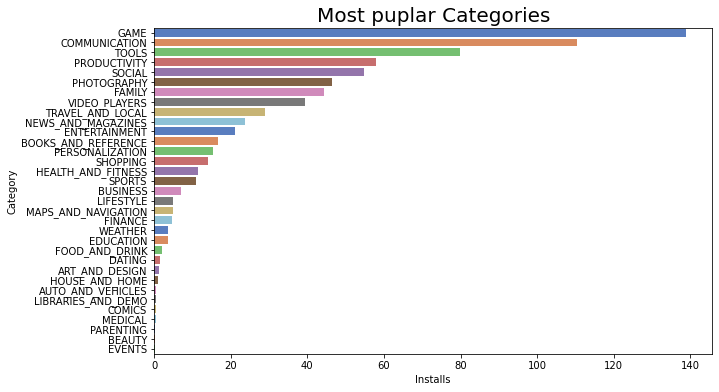

In [25]:
#Create a bar plot for numbers of installs for each Category
bar,ax = plt.subplots(figsize=(10,6)) #Plot size
plt.title('Most puplar Categories',size= 20) #Plot title
#Create a plot
ax = sns.barplot(x=most_puplar_categories.Installs, y=most_puplar_categories.index, data=most_puplar_categories, ci=None, palette="muted",orient='h', )

In [15]:
most = df.groupby(['Content_Rating']).Installs.sum()/100000000

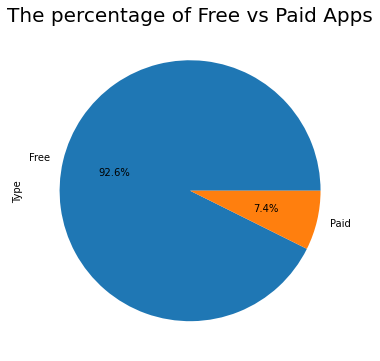

In [16]:
#Create a Series that has the percentage of Free vs Paid Apps
paid_free = df['Type'].value_counts()

#Create plot for the percentage of Free vs Paid Apps
plt.subplots(figsize=[10,6])#Plot size
plt.title('The percentage of Free vs Paid Apps',size = 20) #Plot title
#Create Plot
paid_free.plot.pie(autopct="%.1f%%");

#### Method for evaluation
I created a method for evaluating the models using three evaluation techniques:

1- mean squared error: the average squared difference between the estimated values and the actual value.

2- Mean absolute Error: the difference between the estimated value and actual value.

3- Mean squared Log Error: it operates as the mean squared error but it only care about the percental difference.

In [17]:
#Method for evaluation the model 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict))) #Evaluate using Mean Squered Error
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict))) #Evaluate using Mean Absolute Error
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict))) #Evaluate using Mean Squered log Error

#### Data Splitting
I used Sklearn's train_test_split method, where it splits the data into two parts: One for training and the other for Testing. 

In [42]:
#Splitting data Features(Inputs) and target values(Outputs) for training the model
X = df[['Reviews','Rating','Price']]
y = df.Installs

#Encoding labels to contain only values between 0 and 1
le = preprocessing.LabelEncoder()
for i in range(4):
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    
#Splitting data sets to Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [44]:
#Creating the first model: Support Vector Machine
model = svm.SVR()
model.fit(X_train,y_train) #Fit Data

y_pred = model.predict(X_test) #Predict using testing data

Evaluationmatrix(y_test, y_pred) #Evaluate model

Mean Squared Error: 4153374631470864.0
Mean absolute Error: 9585630.232934462
Mean squared Log Error: 13.661889283779338


In [20]:
#Creating the Seconde model: Logistic Regression 
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)#Fit Data

lr_pred=lr_c.predict(X_test) #Predict using testing data

Evaluationmatrix(y_test, lr_pred)#Evaluate model

Mean Squared Error: 2594835651189125.0
Mean absolute Error: 8377752.930402931
Mean squared Log Error: 16.021734713553123


In [30]:
#Creating the Seconde model: Random Forest Regressor
rdf_c=RandomForestRegressor()
rdf_c.fit(X_train,y_train)#Fit Data

rdf_pred=rdf_c.predict(X_test)#Predict using testing data

Evaluationmatrix(y_test, rdf_pred)#Evaluate model

Mean Squared Error: 2801351362797131.0
Mean absolute Error: 13406642.794010593
Mean squared Log Error: 15.410157038368753


#### Conclusion
I hope that this blog was helpful and beneficial. Looking at the results, I believe that I can improve the models, maybe by changing the Encoding method or normalizing the data. I think we can also find more information by analyzing the ‘Content Rating’ and using to know what each segment of people like. 